<a href="https://colab.research.google.com/github/vasudhaboddukuri/newproject/blob/master/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
import pandas as pd

In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score

In [0]:
df = pd.read_csv('/content/drive/My Drive/Deep_learning_tfidf/Iraq_data.csv')

In [45]:
df = df.loc[(df['DocType']=="Public") | (df["DocType"]=="Private"),:]
df.loc[:,'DocType_id'] = df['DocType'].map({"Public":0, "Private":1})
df

,Text,DocType,DocType_id
0,combine joint task force drive overdose olive ...,Private,1
1,summary diyala explosive remnant war diyala na...,Private,1
2,mnd event unit may event isf soi command post ...,Private,1
3,final report unilateral report cache confirm d...,Private,1
4,mnd event unit mountain division light infantr...,Private,1
...,...,...,...
1685,fifth year run dyncorp international llc di re...,Public,0
1686,dyncorp international di gain important govern...,Public,0
1687,january dyncorp international di one first com...,Public,0
1688,november g job magazine ranked dyncorp interna...,Public,0


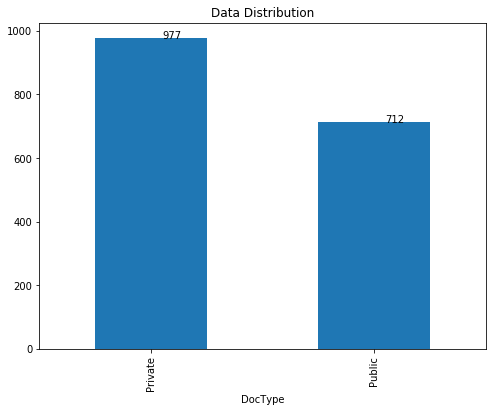

In [43]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
graph = df.groupby('DocType').Text.count().plot.bar(ylim=0)

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))
graph.set_title('Data Distribution') 
plt.show()

In [48]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['Text'],df['DocType_id'],test_size=0.2)
print('Train_X: ', Train_X.shape[0])
print('Train_Y: ', Train_Y.shape[0])
print('Test_X :  ', Test_X.shape[0])
print('Test_Y :  ', Test_Y.shape[0])

Train_X:  1352
Train_Y:  1352
Test_X :   338
Test_Y :   338


In [49]:
Train_counts = pd.DataFrame(Train_Y.values, columns = list('a'))
print('Train Data Distribution')
print(Train_counts['a'].value_counts())

Test_counts = pd.DataFrame(Test_Y.values, columns = list('a'))
print('\n\nTest Data Distribution')
print(Test_counts['a'].value_counts())

Train Data Distribution
1    781
0    571
Name: a, dtype: int64


Test Data Distribution
1    196
0    142
Name: a, dtype: int64


In [50]:
print(df['Text'])

0       combine joint task force drive overdose olive ...
1       summary diyala explosive remnant war diyala na...
2       mnd event unit may event isf soi command post ...
3       final report unilateral report cache confirm d...
4       mnd event unit mountain division light infantr...
                              ...                        
1685    fifth year run dyncorp international llc di re...
1686    dyncorp international di gain important govern...
1687    january dyncorp international di one first com...
1688    november g job magazine ranked dyncorp interna...
1689    fall washington business journal recognize dyn...
Name: Text, Length: 1690, dtype: object


In [24]:
# Tfidf_vect = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='ISO-8859-1', ngram_range=(1, 2))
Tfidf_vect = TfidfVectorizer(ngram_range=(1,2))
#Learn the vocabulary
Tfidf_vect.fit(df['Text'].values.astype('U'))
#x = v.fit_transform(df['Review'].values.astype('U')) 

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [41]:
print(Train_Y)

[[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[0. 1.]
  [1. 0.]]

 ...

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[0. 1.]
  [1. 0.]]]


In [25]:
Train_X_Tfidf = Tfidf_vect.transform(Train_X.values.astype('U'))
print("Train Data (Text, Features):", Train_X_Tfidf.shape)
Test_X_Tfidf = Tfidf_vect.transform(Test_X.values.astype('U'))
print("Test Data (Text, Features):", Test_X_Tfidf.shape)

Train Data (Text, Features): (1352, 114913)
Test Data (Text, Features): (338, 114913)


In [14]:
df_public = df.loc[df["DocType"]=="Public",:]
df_private = df.loc[df["DocType"]=="Private"]
features_public = Tfidf_vect.fit_transform(df_public.Text.values.astype('U'))
features_private = Tfidf_vect.fit_transform(df_private.Text.values.astype('U'))
labels_public = df_public.DocType_id
labels_private = df_private.DocType_id
print("Features for public train data", features_public.shape)
print("Features for private train data", features_private.shape)

Features for public train data (713, 85141)
Features for private train data (977, 32671)


In [0]:
import pandas as pd
import numpy as np
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path

In [19]:
print(Train_X)

457     combine joint task force team explosive ordnan...
565     engineer discover c feb km west khalidiyah c f...
1072    join dyncorp international july first ever pul...
88      explosive ordnance disposal clear x millimeter...
263     nation late report confirm usf mnd event unit ...
                              ...                        
1191    dyncorp international team member fort worth t...
1029    long work current employer even previous emplo...
431     drive overdose olive drab green company comman...
929     ip team found clear cluster bomb holy karbala ...
1560    dyncorp international name one lead veteran fr...
Name: Text, Length: 1352, dtype: object


In [0]:
num_labels = 2
vocab_size = 1352
batch_size = 100
 
# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(Train_X.astype('str'))

 

x_train = tokenizer.texts_to_matrix(Train_X.astype('str'))
x_test = tokenizer.texts_to_matrix(Test_X.astype('str'))
 
encoder = LabelBinarizer()
encoder.fit(Train_Y)
y_train = encoder.transform(Train_Y)
y_test = encoder.transform(Test_Y)

In [0]:
encoder = LabelBinarizer()
encoder.fit(Train_Y)
y_train = encoder.transform(Train_Y)
y_test = encoder.transform(Test_Y)

In [63]:
print(Train_Y)

1611    0
557     1
1341    0
357     1
1629    0
       ..
812     1
1673    0
1041    0
247     1
1473    0
Name: DocType_id, Length: 1352, dtype: int64


In [64]:
print(x_train.shape)

(1352, 114913)


In [65]:
print(y_train)

[[0]
 [1]
 [0]
 ...
 [0]
 [1]
 [0]]


In [73]:
model = Sequential()
model.add(Dense(512, input_shape=(1352,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()
 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 512)               692736    
_________________________________________________________________
activation_47 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_48 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 1)               

In [74]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
 
print('Test accuracy:', score[1])
 
text_labels = encoder.classes_
 


338/338 [==============================] - 0s 48us/step
Test accuracy: 0.5739644843445727


In [79]:
for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction[0])]
    print(Predicted_label)
   # print(test_files_names.iloc[i])
   # print('Actual label:' + Test_Y.iloc[i])
   # print("Predicted label: " + predicted_label)

NameError: ignored